# Lecture - 8

<img src="pandas_python.jpeg" alt="drawing" style="width:300px;"/>

### Using pandas to get data

In [1]:
# pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('Optical_fiber_data.xlsx')

In [4]:
df

,Micrometer,Current
0,9.00,0.0
1,10.60,0.5
2,10.90,1.0
3,11.00,1.4
4,11.20,3.3
5,11.30,6.0
6,11.45,20.6
7,11.50,35.4
8,11.62,79.7
9,11.66,98.0


To take out the datas from the column, we need to use,

In [5]:
x = np.array(df["Micrometer"])
y = np.array(df["Current"])

In [7]:
y

array([  0. ,   0.5,   1. ,   1.4,   3.3,   6. ,  20.6,  35.4,  79.7,
        98. , 108.1, 119.8, 133.6, 154.4, 159.7, 169.5, 175. , 173. ,
       164.6, 154.2, 141.4, 117.8,  98.4,  62. ,  48.8,  33.8,  30. ,
        26.3,  18.8,  12.6,   9. ,   5.7,   3.3,   1.2,   0.5,   0. ])

Let's make a plot

In [8]:
import matplotlib.pyplot as plt

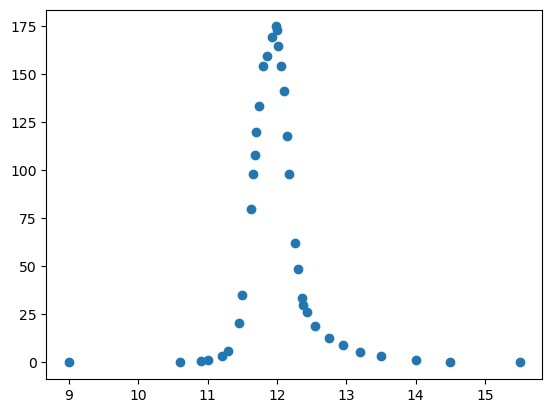

In [10]:
plt.scatter(x,y)
plt.show()

To make it a bit more beautiful,

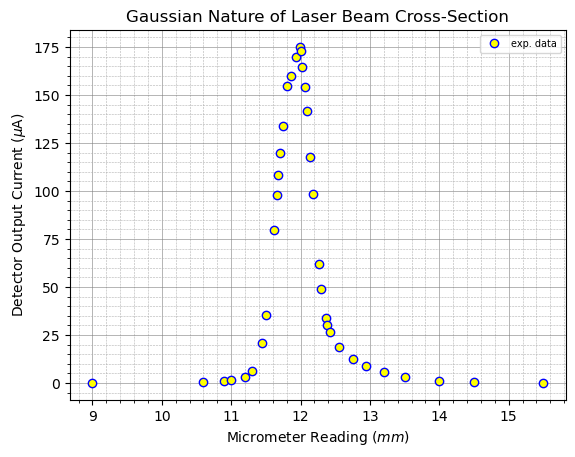

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="0.41")
ax.grid(which = "minor",linestyle = "--", linewidth="0.4")
ax.minorticks_on()
ax.plot(x,y,color="blue",
        marker="o",markeredgecolor="Blue",markerfacecolor="Yellow",ls="--",linewidth="0.001",
        label="exp. data")

ax.legend(loc='best',prop={'size':7})
ax.title.set_text(r"Gaussian Nature of Laser Beam Cross-Section")
ax.set_xlabel(r"Micrometer Reading ($mm$)")
ax.set_ylabel(r"Detector Output Current ($\mu$A)")
plt.show()

To find the gaussian curve equation, we need to fit the curve. Normally, we can take log and process this using least parabolic fit but why bother?

We will use scipy optimize

In [12]:
from scipy.optimize import curve_fit

Remember the equation for Gaussian Curve?

$$
y(x) = A \exp(-\frac{(x-\bar{x})^2}{(4\mu)^2})
$$

For this we define the function,

In [13]:
def gaussian(x,A,x_bar, mu):
    return A*np.exp(-((x - x_bar) / 4 / mu)**2)

In [14]:
gaussian(1,0.5,10,0.5)

8.026140275928058e-10

To get the values of $A$, $\bar{x}$ and $\mu$.

In [15]:
curve_fit(gaussian,x,y)

(array([1.76487007e+02, 1.19253239e+01, 8.56121106e-02]),
 array([[ 4.23815415e+00, -4.34057443e-04, -1.62272555e-03],
        [-4.34057443e-04,  1.06176611e-05,  9.01849368e-08],
        [-1.62272555e-03,  9.01849368e-08,  1.66651093e-06]]))

In [16]:
para_gaus,_ = curve_fit(gaussian,x,y)

In [17]:
para_gaus

array([1.76487007e+02, 1.19253239e+01, 8.56121106e-02])

In [20]:
para_gaus[2]

0.08561211059783086

In [21]:
xx = np.linspace(9.5,16,1000)
y_vals_eq = gaussian(xx, para_gaus[0],para_gaus[1],para_gaus[2])

In [22]:
gaussian(12, para_gaus[0],para_gaus[1],para_gaus[2])

168.29104213095727

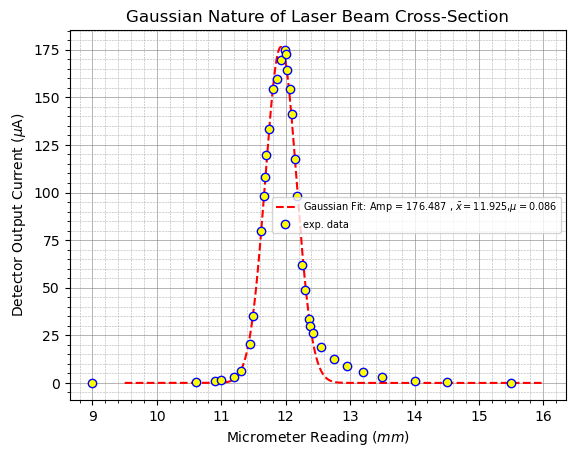

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="0.41")
ax.grid(which = "minor",linestyle = "--", linewidth="0.4")
ax.minorticks_on()
ax.plot(xx,y_vals_eq,color='Red',ls="--",
        label=r"Gaussian Fit: Amp = %s , $\bar{x} = $%s,$\mu = $%s"
        %(round(para_gaus[0],3),round(para_gaus[1],3),round(para_gaus[2],3)))
ax.plot(x,y,color="blue",
        marker="o",markeredgecolor="Blue",markerfacecolor="Yellow",ls="--",linewidth="0.001",
        label="exp. data")

ax.legend(loc='best',prop={'size':7})
ax.title.set_text(r"Gaussian Nature of Laser Beam Cross-Section")
ax.set_xlabel(r"Micrometer Reading ($mm$)")
ax.set_ylabel(r"Detector Output Current ($\mu$A)")
# plt.savefig('plot.pdf',bbox_inches="tight")
plt.show()

### Another Example

In [26]:
df1 = pd.read_excel('franck_hertz.xlsx')
df1

,Acceleration Potential (VG2k),Plate Current (IpA) Multiplier 10-9
0,1.0,0.06
1,1.5,0.06
2,2.0,0.06
3,2.5,0.06
4,3.0,0.06
...,...,...
196,90.0,1.52
197,90.5,1.46
198,91.0,1.43
199,91.5,1.37


In [27]:
x1 = np.array(df1["Acceleration Potential (VG2k)"])
y1 = np.array(df1["Plate Current (IpA) Multiplier 10-9"])

In [29]:
len(x1)

201

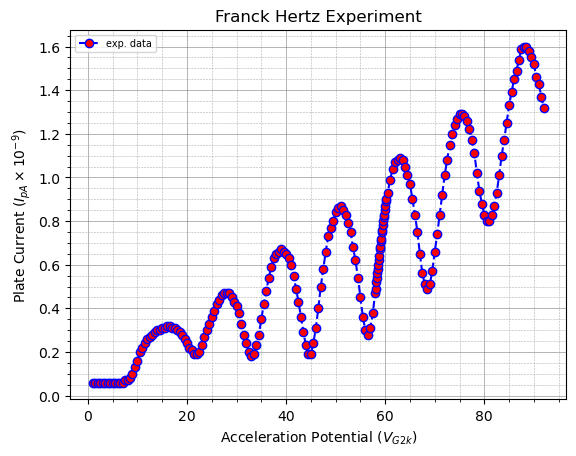

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="0.41")
ax.grid(which = "minor",linestyle = "--", linewidth="0.4")
ax.minorticks_on()
# ax.scatter(x1,y1)
ax.plot(x1,y1,color="blue",
        marker="o",markeredgecolor="Blue",markerfacecolor="Red",ls="--",
        label="exp. data")

ax.legend(loc='best',prop={'size':7})
ax.title.set_text(r"Franck Hertz Experiment")
ax.set_xlabel(r"Acceleration Potential ($V_{G2k}$)")
ax.set_ylabel(r"Plate Current ($I_{pA}\times 10^{-9}$)")
plt.show()

Let's say I want to mark the all local maximas

We will use scipy find_peaks function.

In [34]:
from scipy.signal import find_peaks

In [37]:
max_ind = find_peaks(y1)
max_ind[0]

array([ 30,  54,  76, 100, 142, 166, 192])

In [40]:
y1[max_ind[0]]# return index values

array([0.32, 0.47, 0.67, 0.87, 1.09, 1.29, 1.6 ])

In [41]:
y_maxs = y1[max_ind[0]]
x_maxs = x1[max_ind[0]]

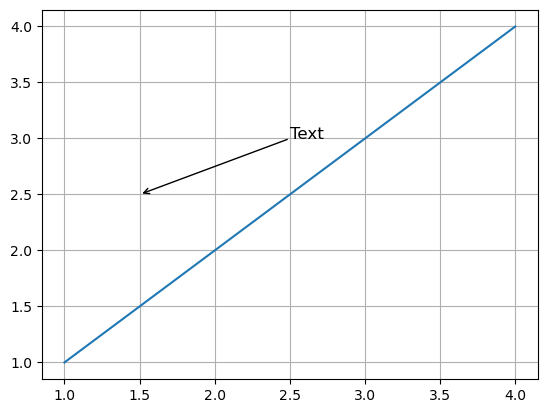

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([1,2,3,4],[1,2,3,4])
ax.grid()
ax.annotate("", xy=(1.5, 2.5), xytext=(2.5, 3),arrowprops=dict(arrowstyle="->"))
ax.text(2.5, 3, "Text", fontsize=12)
plt.show()


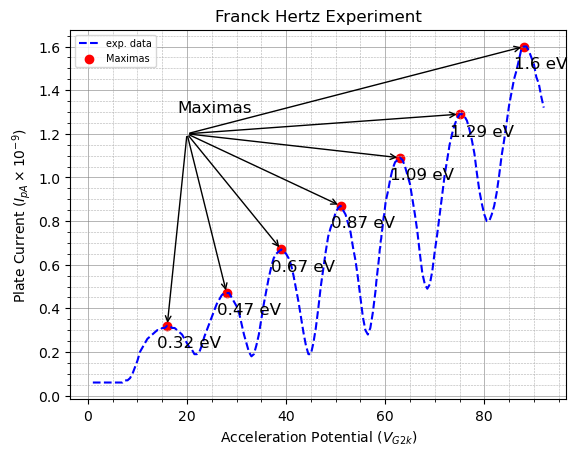

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="0.41")
ax.grid(which = "minor",linestyle = "--", linewidth="0.4")
ax.minorticks_on()
ax.plot(x1,y1,color="blue",ls="--",
        label="exp. data")
ax.scatter(x_maxs,y_maxs, label="Maximas",color="Red")
ax.legend(loc='best',prop={'size':7})
for i in max_ind[0]:
        ax.annotate("", xy=(x1[i], y1[i]), xytext=(20, 1.2),
            arrowprops=dict(arrowstyle="->"))
        ax.text(x1[i]-2, y1[i]-0.1, "%s eV"%y1[i], fontsize=12)
ax.text(18, 1.3, "Maximas", fontsize=12)
ax.title.set_text(r"Franck Hertz Experiment")
ax.set_xlabel(r"Acceleration Potential ($V_{G2k}$)")
ax.set_ylabel(r"Plate Current ($I_{pA}\times 10^{-9}$)")
plt.show()

In [56]:
?plt.annotate

Signature:
plt.annotate(
    text: 'str',
    xy: 'tuple[float, float]',
    xytext: 'tuple[float, float] | None' = None,
    xycoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float]' = 'data',
    textcoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float] | None' = None,
    arrowprops: 'dict[str, Any] | None' = None,
    annotation_clip: 'bool | None' = None,
    **kwargs,
) -> 'Annotation'
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.

xy : (float, float)
    The point *(x, y)* to annotate. The coordinate system is determined
    by *xycoords*.

xytext : (float, float), default: *xy*
    The position 

In [61]:
df = pd.read_excel("LDR_data.xlsx",sheet_name="red")
df

,Distance(cm),Voltage(V),Current(mA),Intensity(Lux)
0,50,7.81,5.0,280
1,45,7.37,5.5,340
2,40,7.05,5.8,380
3,35,6.58,6.3,460
4,30,6.13,6.7,570
5,25,5.64,7.2,590
6,20,5.15,7.7,710
7,15,4.42,8.5,880
8,10,3.85,9.0,910


In [62]:
files = ['white','blue','green','red']
Intensity = [];Resistance = []
Distance = []

In [63]:
for i in files:
    df = pd.read_excel("LDR_data.xlsx",sheet_name=i)
    dist = np.array(df["Distance(cm)"])
    Inte = np.array(df["Intensity(Lux)"])
    V = np.array(df["Voltage(V)"])
    I = np.array(df["Current(mA)"])*0.001
    R = V/I
    print("For ",i," Intensity = ",Inte)
    print("For ",i," resistance = ",R)
    Distance.append(dist)
    Resistance.append(R)
    Intensity.append(Inte)
    print("-------------------------------------------------------------")

For  white  Intensity =  [ 3100  3520  4250  4990  6060  7880  9750 12460 16000]
For  white  resistance =  [612.5        554.21686747 500.         465.90909091 402.17391304
 343.75       303.03030303 252.42718447 214.95327103]
-------------------------------------------------------------
For  blue  Intensity =  [1120 1340 1550 1840 2280 2380 3160 3840 4300]
For  blue  resistance =  [3276.66666667 2990.625      2660.         2368.42105263 2121.95121951
 1853.33333333 1612.24489796 1336.36363636 1125.        ]
-------------------------------------------------------------
For  green  Intensity =  [1090 1270 1480 1910 2130 2210 2970 3690 3990]
For  green  resistance =  [1213.79310345 1080.64516129  972.30769231  847.14285714  739.18918919
  646.15384615  533.33333333  435.55555556  360.        ]
-------------------------------------------------------------
For  red  Intensity =  [280 340 380 460 570 590 710 880 910]
For  red  resistance =  [1562.         1340.         1215.51724138 1044.44

In [64]:
def inte_resis_log(I,m,c):
    return I*m + c

In [65]:
log_inte = []; log_resis = []; para = []
plot_array = []
for i in range(len(files)):
    a = np.log(Intensity[i]); b = np.log(Resistance[i])
    log_inte.append(a); log_resis.append(b)
    param, pcov= curve_fit(inte_resis_log,a,b)
    para.append(param)
    array = np.linspace(min(a)-0.1,max(a)+0.1,1000)
    plot_array.append(array)
    print("(slope, intersection) = ",param)

(slope, intersection) =  [-0.6308361  11.49055639]
(slope, intersection) =  [-0.77245898 13.56170916]
(slope, intersection) =  [-0.90240867 13.46308859]
(slope, intersection) =  [-1.03253158 13.24040194]


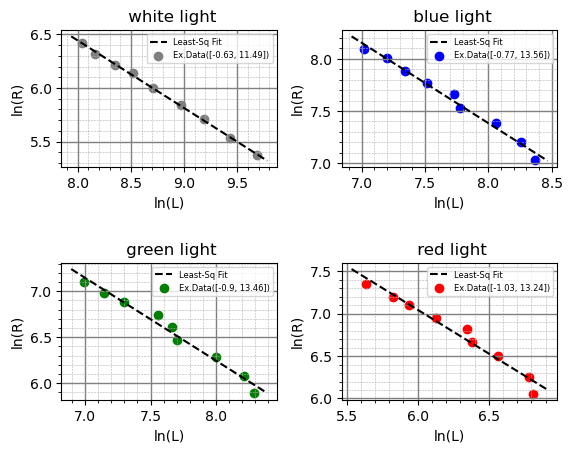

In [70]:
#analysis
Color = ["grey","blue","green","red"]
fig = plt.figure()
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
for i in range(len(files)):
    ax = fig.add_subplot(2,2,i+1)
#     ax.subplot(2,2,i+1)
    ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="1")
    ax.grid(which = "minor",linestyle = "--", linewidth="0.4")
    ax.minorticks_on()
    ax.plot(plot_array[i],
            inte_resis_log(plot_array[i],para[i][0],para[i][1]),
            ls="--" ,color="black",label="Least-Sq Fit")
    ax.scatter(log_inte[i],log_resis[i],color=Color[i],
               label="Ex.Data(%s)"%[round(para[i][0],2),round(para[i][1],2)])
    ax.legend(loc='best',prop={'size':6})
    ax.title.set_text(" %s light"%(files[i]))
    plt.xlabel("ln(L)")
    plt.ylabel("ln(R)")
plt.savefig('All_for_one.pdf')
plt.show()

In [71]:
x = np.linspace(1,10,1000)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.cos(x) + np.sin(x)


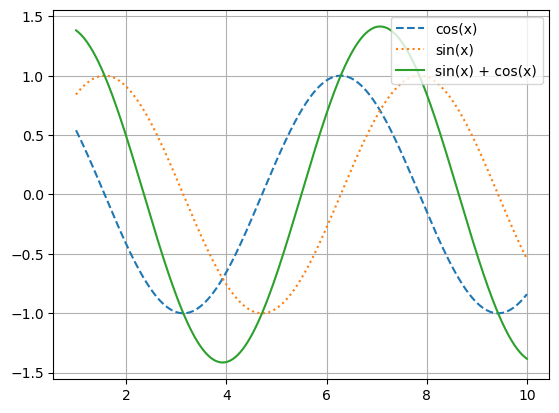

In [77]:
plt.plot(x,y1,label="cos(x)",ls="--")
plt.plot(x,y2,label="sin(x)",ls=":")
plt.plot(x,y3,label="sin(x) + cos(x)")
plt.grid()
plt.legend()
plt.show()

In [78]:
x = np.array([2,4,7,10,12,15])
y = np.array([6.5,14,21.6,31.3,36.2,46.2])

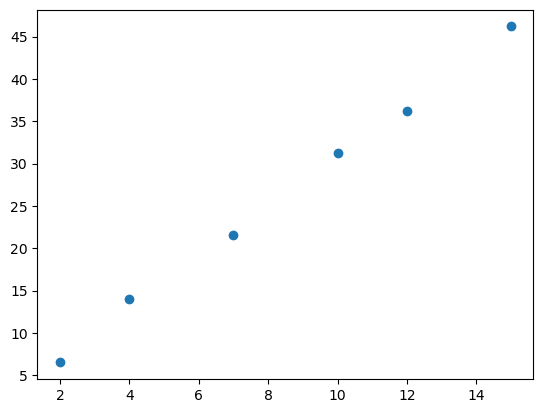

In [79]:
plt.scatter(x,y)

In [80]:
def least_fit_my(x,y):
    n = len(x)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = 0; x_2 = 0
    for i in range(n):
        xy_sum += x[i]*y[i]
        x_2 += pow(x[i],2)
    m = (n*xy_sum - (x_sum*y_sum))/(n*x_2 - (x_sum)**2)
    c = (y_sum - m*x_sum)/n
    return m,c

In [83]:
m,c = least_fit_my(x,y)

In [84]:
def line(x,m, c):
    return m*x+c
    

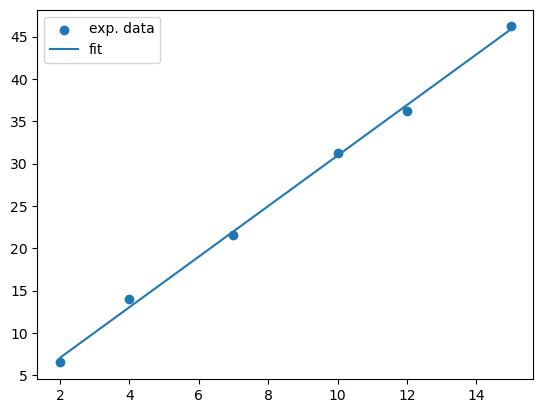

In [85]:
xx = np.linspace(2,15,1000)
plt.scatter(x,y,label="exp. data")
plt.plot(xx,line(xx,m,c),label="fit")
plt.legend()
plt.show()

In [86]:
para,_ = curve_fit(line,x,y)
para

array([2.98571429, 1.08571429])

In [87]:
m

2.985714285714285

In [88]:
c

1.0857142857142936